3.0348542587702925


<Figure size 576x576 with 0 Axes>

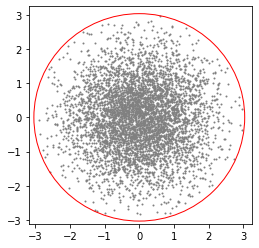

In [175]:
%matplotlib inline
import sys
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import pairwise_distances
from matplotlib.patches import Ellipse
from scipy.special import gammainccinv, gamma
from bisect import bisect
from sklearn.preprocessing import normalize
plt.figure(figsize=(8,8))

sample_size = 5000
dimensions = 2

def gaussian_kernel(x, kernel_width):
    return np.exp(-(x ** 2) / (2 * kernel_width ** 2))
  
def uniform_kernel(x):
    return 1

def sqcos_kernel(x):
    return np.cos(x)**2
  
def _transform(kernel, dimensions, sample_size = 1000, radius_max=1):
    # Approximate cumulative distribution function
    cdf_samples = np.array([kernel(x)*(x**(dimensions-1)) for x in np.linspace(0, radius_max, sample_size)])
    cdf_samples = np.cumsum(cdf_samples)
    cdf_samples /= cdf_samples[-1]

    # Return inverse of cdf
    return lambda y: radius_max * (bisect(cdf_samples, y) / sample_size)


p=0.99
kernel_width = 1
accounted_kernel = lambda x: gaussian_kernel(x, kernel_width)
#accounted_kernel = lambda x: uniform_kernel(x)
#accounted_kernel = lambda x: sqcos_kernel(x)

# This is equivalent to  \Gamma^-1(n/2, (1-p) \Gamma(n/2)) from the paper
# The difference is that gammainccinv is regularized. This prevents us from running into
# issues, as \Gamma(n/2) quickly with x!.
radius_max = kernel_width * np.sqrt(2*gammainccinv(dimensions/2, (1-p)))  # for gaussian
#radius_max=1  # for uniform
#radius_max=np.pi/2  # for sqcos
print(radius_max)
distance_kernel = np.vectorize(_transform(accounted_kernel, dimensions, radius_max=radius_max))


samples = np.random.normal(size=(sample_size, dimensions))
samples = normalize(samples)
samples *= distance_kernel(np.random.uniform(size=sample_size)).reshape(-1,1)
#samples *= np.random.uniform(size=sample_size).reshape(-1,1) ** (1/dimensions)
  

plt.figure(figsize=(4,4))
plot = plt.scatter(samples[:,0], samples[:,1], s = 1, c='gray') #np.around(weights, 10))
circle = Ellipse((0, 0), width=2*radius_max, height=2*radius_max, color='r', lw=1, fill=False)
plot.axes.add_artist(circle)
plt.show()
#plt.savefig("sqcos.pdf")

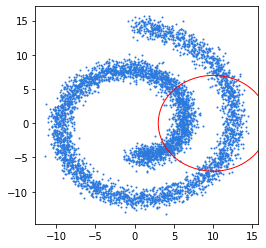

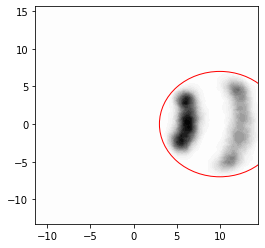

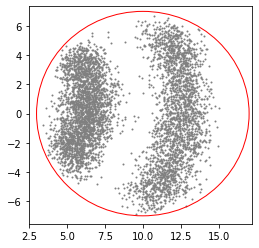

In [35]:
from sklearn.datasets import make_swiss_roll
from sklearn.neighbors import KernelDensity
from sklearn.metrics import pairwise_distances

samples, y = make_swiss_roll(5001, noise=0.75)
samples = np.delete(samples, 1, 1)  # to 2D

plt.figure(figsize=(4,4))
plot = plt.scatter(samples[:,0], samples[:,1], s=1, c='#2c79de')
radius_max = 7
circle = Ellipse((10, 0), width=2*radius_max, height=2*radius_max, color='r', fill=False)
plot.axes.add_artist(circle)
plt.show()
#plt.savefig('kde01.pdf')
mask = np.linalg.norm(samples - [10, 0], axis=1) < radius_max - 1
kde = KernelDensity(kernel='tophat',bandwidth=1)
kde.fit(samples[mask])

x = np.linspace(np.min(samples[:,0]), np.max(samples[:,0]), 100)
y = np.linspace(np.min(samples[:,1]), np.max(samples[:,1]), 100)
X, Y = np.meshgrid(x, y)
xy = np.vstack([X.ravel(), Y.ravel()]).T
Z = np.exp(kde.score_samples(xy))
Z = Z.reshape(X.shape)
levels = np.linspace(0, Z.max(), 25)
plt.figure(figsize=(4,4))
plot = plt.contourf(X, Y, Z, levels = levels, cmap=plt.cm.Greys)
circle = Ellipse((10, 0), width=2*radius_max, height=2*radius_max, color='r', fill=False)
plot.axes.add_artist(circle)
plt.show()
#plt.savefig('kde02.pdf')

samples = kde.sample(5000)
  
plt.figure(figsize=(4,4))
plot = plt.scatter(samples[:,0], samples[:,1], s = 1, c='grey')
circle = Ellipse((10, 0), width=2*radius_max, height=2*radius_max, color='r', fill=False)
plot.axes.add_artist(circle)
plt.xlim(2.5,17.2)
plt.show()
#plt.savefig('kde03.pdf')

kernel width 2.25
radius 20
147.84460378727798 104.12710865080231 60.28729972045589


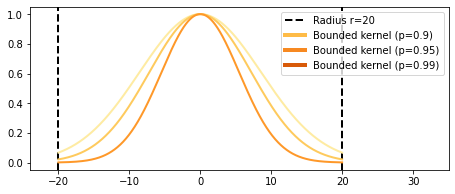

In [146]:
def gaussian_kernel(x, kernel_width):
    return np.exp(-(x ** 2) / (2 * kernel_width ** 2))

yellow1 = plt.cm.YlOrBr(0.4)
yellow2 = plt.cm.YlOrBr(0.55)
yellow3 = plt.cm.YlOrBr(0.7)

fig, ax = plt.subplots(figsize=(7.5,3))

p1 = 0.95
p2 = 0.99
p3 = 0.999
radius = 20
plt.axvline(x=-radius,c='black',linestyle='--',lw=2)
plt.axvline(x=radius,c='black',linestyle='--',lw=2)
print('radius', radius)

plt.xlim(-radius * 1.2, radius * 1.75)

kw1 = np.sqrt(radius**2 / (2 * gammainccinv(d/2, (1 - p1))))
kw2 = np.sqrt(radius**2 / (2 * gammainccinv(d/2, (1 - p2))))
kw3 = np.sqrt(radius**2 / (2 * gammainccinv(d/2, (1 - p3))))

print(kw1, kw2, kw3)

x2 = np.arange(-radius, radius, 0.01)
y2 = gaussian_kernel(x2, kw1).reshape(-1,1)
ax.plot(x2, y2, lw=2, c=red1)
y2 = gaussian_kernel(x2, kw2).reshape(-1,1)
ax.plot(x2, y2, lw=2, c=red2)
y2 = gaussian_kernel(x2, kw3).reshape(-1,1)
ax.plot(x2, y2, lw=2, c=red3)

from matplotlib.lines import Line2D
legend_elements = [
  Line2D([0], [0], color='black', linestyle='--', lw=2, label='Radius r='+str(radius)), 
  Line2D([0], [0], color=yellow1, lw=4, label='Bounded kernel (p=' + str(p1) + ")"),
  Line2D([0], [0], color=yellow2, lw=4, label='Bounded kernel (p=' + str(p2) + ")"),
  Line2D([0], [0], color=yellow3, lw=4, label='Bounded kernel (p=' + str(p3) + ")")
]
ax.legend(handles=legend_elements, loc='upper right')
plt.show()
#plt.savefig('gaussian_effect_p.pdf')